In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
ds = pd.read_csv("../data/boa/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [3]:
nonds = pd.read_csv("../data/non-data-science/github_api.csv", parse_dates=['created_at', 'updated_at', 'pushed_at'])

In [4]:
def plot_all(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    start = max(0.9, min(np.min(xs1), np.min(xs2)))
    end = max(0.9, np.max(xs1), np.max(xs2))
    logbins = np.logspace(np.log10(start),np.log10(end)+0.001,1000)
    
    plt.hist(xs1, bins=logbins, density=True, histtype='step', cumulative=True, label='ds')
    plt.hist(xs2, bins=logbins, density=True, histtype='step', cumulative=True, label='non-ds')
    plt.xscale('log')
    plt.title('distribution of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('CDF')
    plt.legend(loc='upper left')
    plt.savefig(dim + '-cdf.png', dpi=300)
    plt.show()
    
    return stats.ks_2samp(xs1, xs2)

In [5]:
dims = ['stars', 'size', 'forks_count', 'open_issues_count', 'watch', 'number_of_contributors']

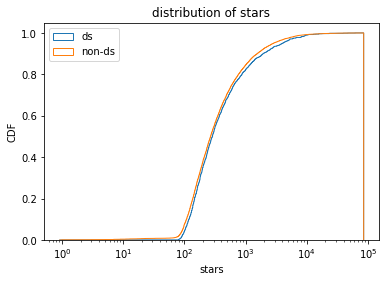

Ks_2sampResult(statistic=0.044357699201088306, pvalue=1.0)


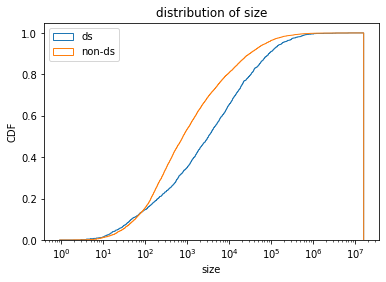

Ks_2sampResult(statistic=0.2000419381693676, pvalue=1.0)


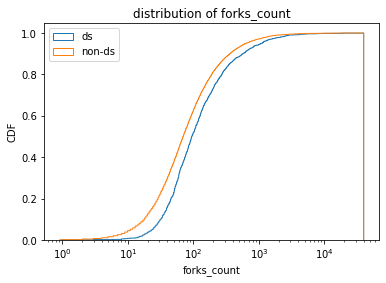

Ks_2sampResult(statistic=0.15177105306534636, pvalue=1.0)


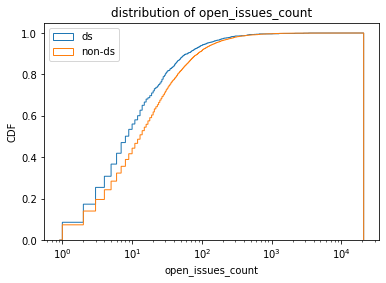

Ks_2sampResult(statistic=0.1100121902365438, pvalue=1.0)


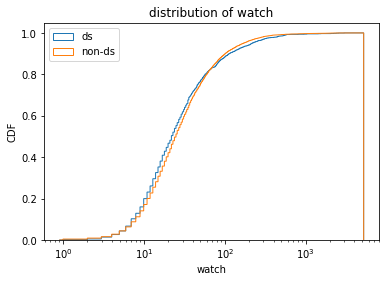

Ks_2sampResult(statistic=0.05166792898469987, pvalue=1.0)


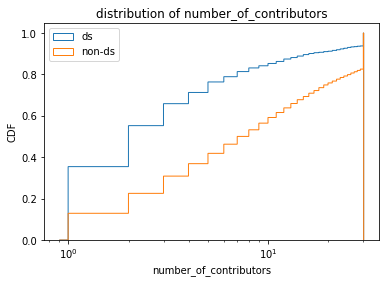

Ks_2sampResult(statistic=0.3474551251155386, pvalue=4.4428741415856067e-141)


In [6]:
for dim in dims:
    print(plot_all(dim))

In [7]:
df = pd.DataFrame({"DS": ds.number_of_contributors.value_counts().sort_index(), "Non-DS": nonds.number_of_contributors.value_counts().sort_index()})
df.index.names = ['contributors']
df

,DS,Non-DS
contributors,,
0,16,85
1,545,1268
2,304,943
3,163,816
4,83,589
5,78,488
6,39,433
7,38,368
8,27,313


In [8]:
def plot_all_date(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]


    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    
    plt.hist(xs1, bins=1000, range=(start, end), density=True, histtype='step', cumulative=True, label='ds')
    plt.hist(xs2, bins=1000, range=(start, end), density=True, histtype='step', cumulative=True, label='non-ds')
    plt.title('distribution of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('CDF')
    plt.legend(loc='upper left')
    plt.savefig(dim + '-cdf.png', dpi=300)
    plt.show()
    
    # convert timestamp to numerical values (so we can calc stats) 
    xs1 = xs1.map(lambda x: x.value)
    xs2 = xs2.map(lambda x: x.value)
    return stats.ks_2samp(xs1, xs2)

In [9]:
dims_date = ['created_at', 'updated_at', 'pushed_at']

/home/andrew/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/home/andrew/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, Futu

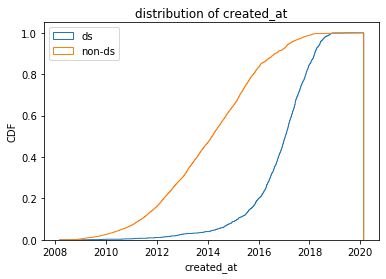

Ks_2sampResult(statistic=0.6418106074357834, pvalue=0.0)


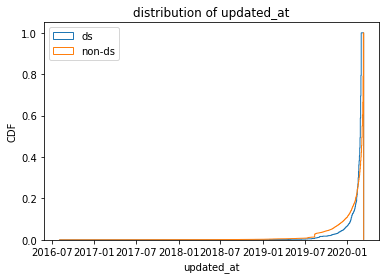

Ks_2sampResult(statistic=0.5837887067395264, pvalue=0.0)


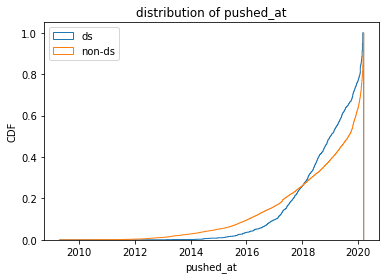

Ks_2sampResult(statistic=0.17364905889496055, pvalue=1.0)


In [10]:
for dim in dims_date:
    print(plot_all_date(dim))

In [11]:
def plot_all_date_survival(dim):
    xs1 = ds[dim]
    xs2 = nonds[dim]
    start = min(np.min(xs1), np.min(xs2))
    end = max(np.max(xs1), np.max(xs2))
    
    plt.hist(xs1, bins=1000, range=(start, end), density=False, histtype='step', cumulative=-1, label='ds')
    plt.hist(xs2, bins=1000, range=(start, end), density=False, histtype='step', cumulative=-1, label='non-ds')
    plt.title('survival plot of ' + dim)
    plt.xlabel(dim)
    plt.ylabel('Survival')
    plt.legend(loc='upper right')
    plt.savefig(dim + '-survival.png', dpi=300)
    plt.show()

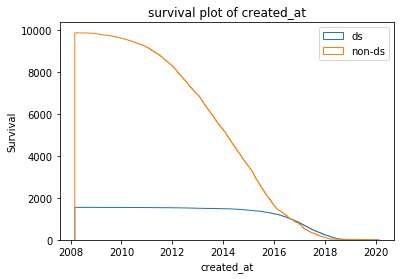

In [12]:
plot_all_date_survival('created_at')